In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_recall_curve, auc, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [35]:
data=pd.read_csv('creditcard.csv')

In [36]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [38]:
non_fraud = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [39]:
X = data.drop(columns='Class', axis=1)
Y = data['Class']

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
X_non_fraud = non_fraud.drop(columns='Class', axis=1)
X_non_fraud_scaled = scaler.fit_transform(X_non_fraud)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

In [43]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

In [44]:
X_non_fraud = X_resampled[Y_resampled == 0]

AUC-PR: 0.46


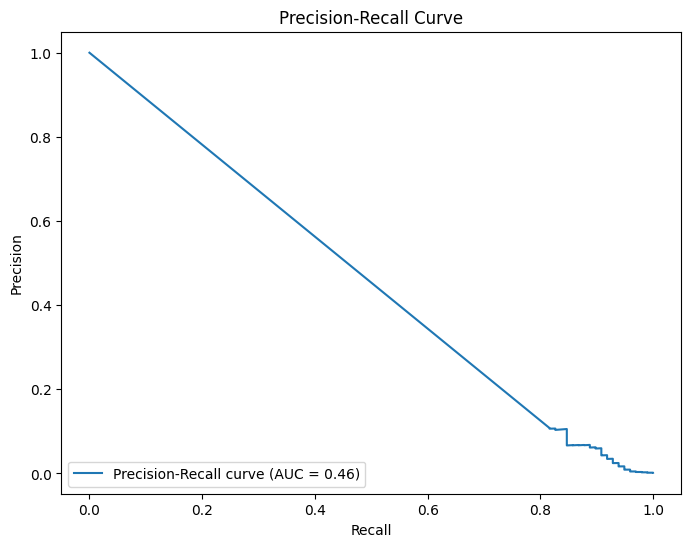

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.90      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



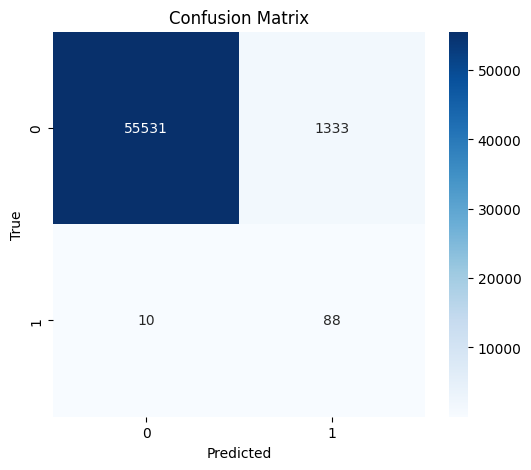

In [45]:
## Naive Bayes

model1 = GaussianNB()
model1.fit(X_resampled, Y_resampled)

probabilities = model1.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, probabilities)

auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Y_pred = model1.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC-PR: 0.79


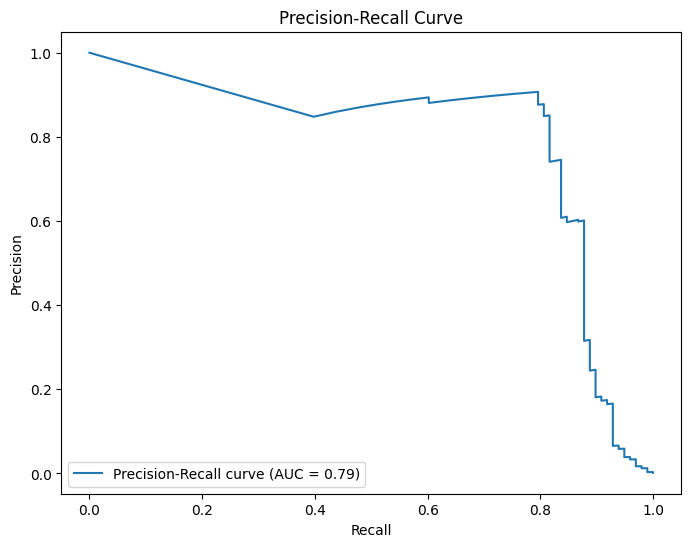

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.95      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.97      0.99     56962



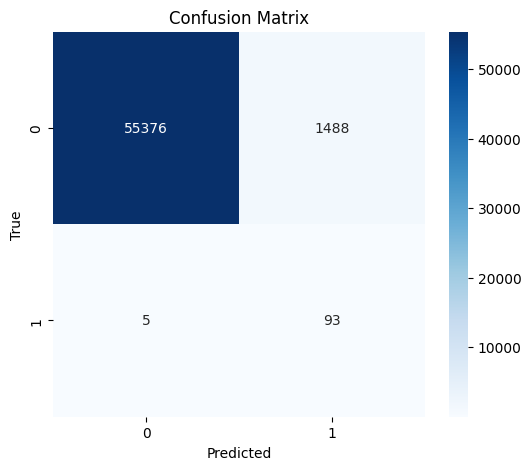

In [46]:
## Logistic Regression

model2 = LogisticRegression(class_weight='balanced', random_state=2)
model2.fit(X_resampled, Y_resampled)

probabilities = model2.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, probabilities)

auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Y_pred = model2.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC-PR: 0.61


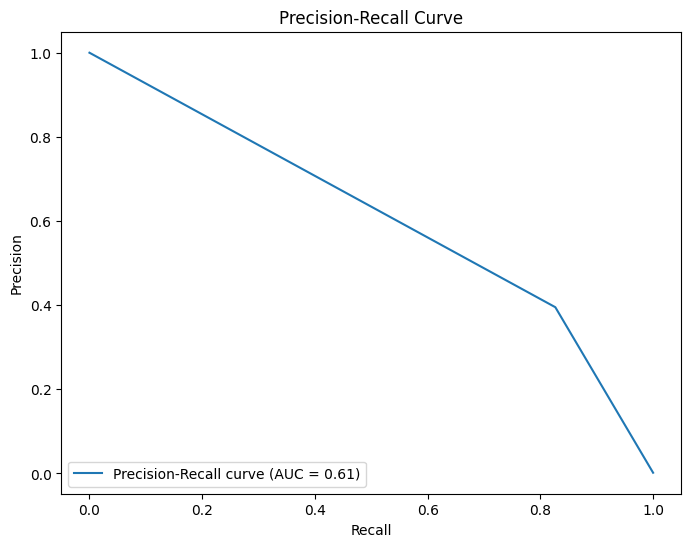

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.83      0.53        98

    accuracy                           1.00     56962
   macro avg       0.70      0.91      0.77     56962
weighted avg       1.00      1.00      1.00     56962



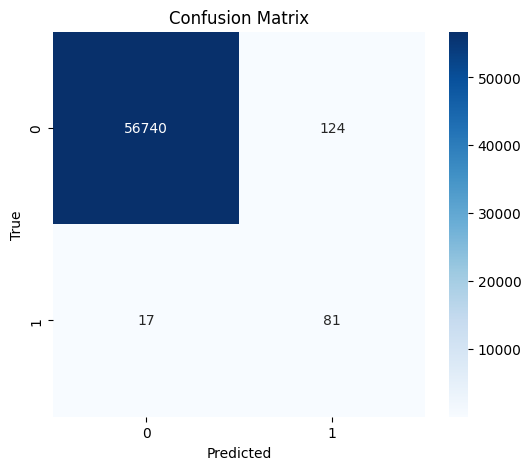

In [47]:
## Decision Tree

model3 = DecisionTreeClassifier(class_weight="balanced", random_state=42)
model3.fit(X_resampled, Y_resampled)

probabilities = model3.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, probabilities)

auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Y_pred = model3.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Params: n_estimators=100, max_samples=0.5, max_features=0.5, AUC-PR=0.0919
Params: n_estimators=100, max_samples=0.5, max_features=0.7, AUC-PR=0.1062
Params: n_estimators=100, max_samples=0.5, max_features=1.0, AUC-PR=0.0840
Params: n_estimators=100, max_samples=0.7, max_features=0.5, AUC-PR=0.1127
Params: n_estimators=100, max_samples=0.7, max_features=0.7, AUC-PR=0.1039
Params: n_estimators=100, max_samples=0.7, max_features=1.0, AUC-PR=0.0844
Params: n_estimators=100, max_samples=1.0, max_features=0.5, AUC-PR=0.1006
Params: n_estimators=100, max_samples=1.0, max_features=0.7, AUC-PR=0.1041
Params: n_estimators=100, max_samples=1.0, max_features=1.0, AUC-PR=0.0958
Params: n_estimators=200, max_samples=0.5, max_features=0.5, AUC-PR=0.0989
Params: n_estimators=200, max_samples=0.5, max_features=0.7, AUC-PR=0.1007
Params: n_estimators=200, max_samples=0.5, max_features=1.0, AUC-PR=0.0842
Params: n_estimators=200, max_samples=0.7, max_features=0.5, AUC-PR=0.1012
Params: n_estimators=200,

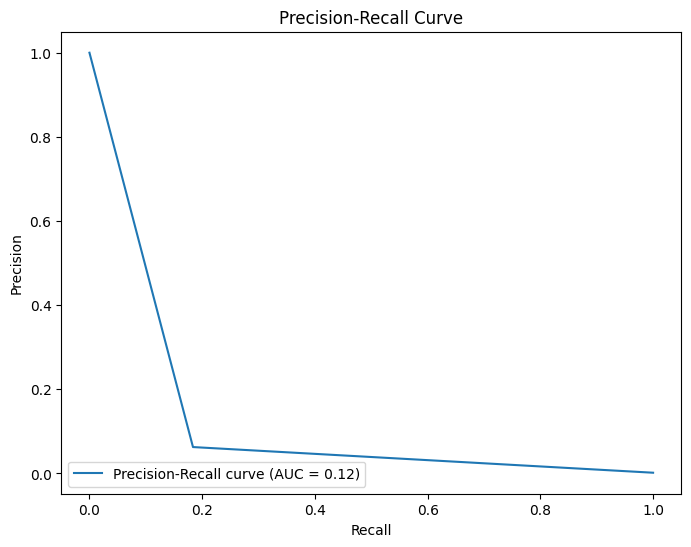

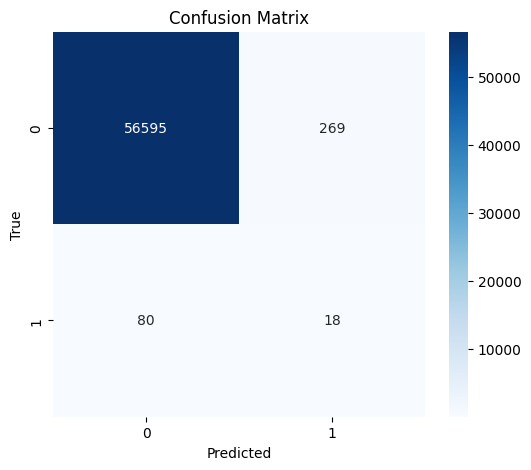

In [49]:
## Isolation Forest

pca = PCA(n_components=0.95)  # Retain 95% variance
X_resampled_pca = pca.fit_transform(X_resampled)
X_test_pca = pca.transform(X_test)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Best parameters tracker
best_auc_pr = 0
best_params = None
model4 = None

# Perform Grid Search
for n_estimators in param_grid['n_estimators']:
    for max_samples in param_grid['max_samples']:
        for max_features in param_grid['max_features']:
            # Initialize and train Isolation Forest
            model = IsolationForest(
                n_estimators=n_estimators,
                max_samples=max_samples,
                max_features=max_features,
                contamination=0.017,  # Adjust based on your dataset
                random_state=42
            )
            model.fit(X_resampled_pca)  # Fit on PCA-transformed training data

            # Predict anomalies on the test data
            test_predictions = model.predict(X_test_pca)
            test_predictions = np.where(test_predictions == -1, 1, 0)  # Convert -1 to 1 (fraud), 1 to 0 (non-fraud)

            # Calculate AUC-PR
            precision, recall, _ = precision_recall_curve(Y_test, test_predictions)
            auc_pr = auc(recall, precision)

            print(f"Params: n_estimators={n_estimators}, max_samples={max_samples}, max_features={max_features}, AUC-PR={auc_pr:.4f}")

            # Track the best model
            if auc_pr > best_auc_pr:
                best_auc_pr = auc_pr
                best_params = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}
                model4 = model

# Output the best parameters
print("\nBest Parameters:", best_params)
print("Best AUC-PR:", best_auc_pr)

test_predictions = model4.predict(X_test_pca)
test_predictions = np.where(test_predictions == -1, 1, 0) 

precision, recall, thresholds = precision_recall_curve(Y_test, test_predictions)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

cm = confusion_matrix(Y_test, test_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC-PR: 0.47


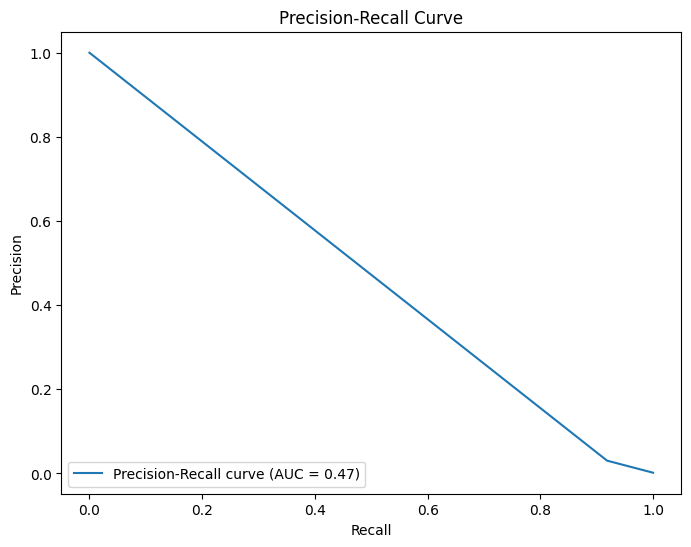

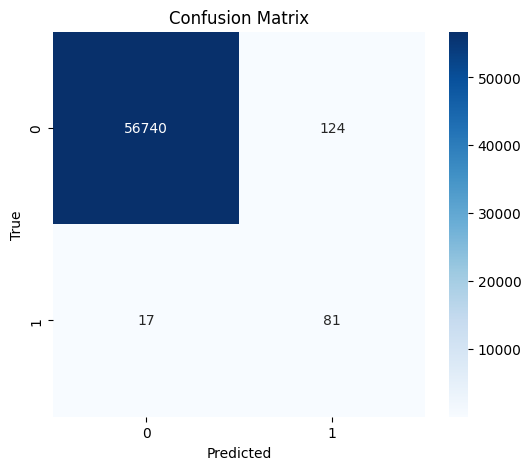

In [50]:
## One Class SVM

model5 = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.05)
model5.fit(X_non_fraud)

test_predictions = model5.predict(X_test)
test_predictions = np.where(test_predictions == -1, 1, 0)

precision, recall, thresholds = precision_recall_curve(Y_test, test_predictions)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Params: nu=0.01, gamma=0.001, AUC-PR=0.4159
Params: nu=0.01, gamma=0.01, AUC-PR=0.4920
Params: nu=0.01, gamma=0.1, AUC-PR=0.5288
Params: nu=0.05, gamma=0.001, AUC-PR=0.4759
Params: nu=0.05, gamma=0.01, AUC-PR=0.4759
Params: nu=0.05, gamma=0.1, AUC-PR=0.4791
Params: nu=0.1, gamma=0.001, AUC-PR=0.4833
Params: nu=0.1, gamma=0.01, AUC-PR=0.4833
Params: nu=0.1, gamma=0.1, AUC-PR=0.4938

Best Parameters: {'nu': 0.01, 'gamma': 0.1}
Best AUC-PR: 0.5288390025800458


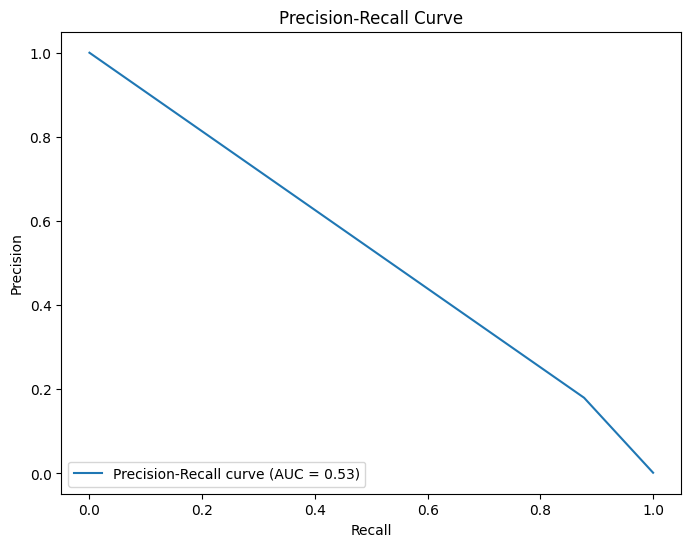

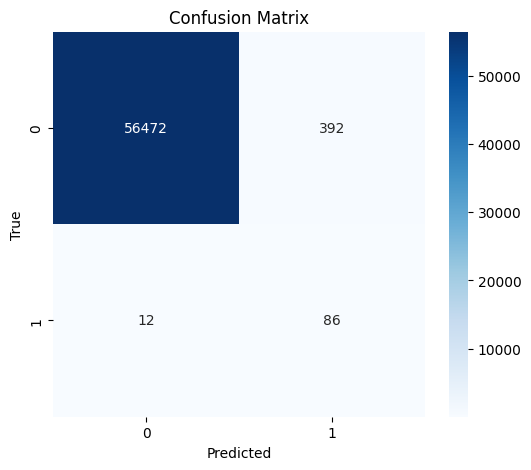

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.88      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [52]:
# Define hyperparameter grid
param_grid = {
    'nu': [0.01, 0.05, 0.1],  # Proportion of anomalies in the training data
    'gamma': [0.001, 0.01, 0.1]  # Kernel coefficient
}

# Best parameters tracker
best_auc_pr = 0
best_params = None
best_model = None

# Perform manual grid search
for nu in param_grid['nu']:
    for gamma in param_grid['gamma']:
        # Train One-Class SVM
        model = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
        model.fit(X_non_fraud_scaled)  # Train only on non-fraud data

        # Predict on the test set
        test_predictions = model.predict(X_test)
        test_predictions = np.where(test_predictions == -1, 1, 0)  # Convert -1 to 1 (fraud), 1 to 0 (non-fraud)

        # Calculate AUC-PR
        precision, recall, _ = precision_recall_curve(Y_test, test_predictions)
        auc_pr = auc(recall, precision)

        print(f"Params: nu={nu}, gamma={gamma}, AUC-PR={auc_pr:.4f}")

        # Track the best model
        if auc_pr > best_auc_pr:
            best_auc_pr = auc_pr
            best_params = {'nu': nu, 'gamma': gamma}
            best_model = model

# Output the best parameters
print("\nBest Parameters:", best_params)
print("Best AUC-PR:", best_auc_pr)

# Evaluate the best model
test_predictions = best_model.predict(X_test)
test_predictions = np.where(test_predictions == -1, 1, 0)

# Precision-Recall Curve and AUC-PR
precision, recall, thresholds = precision_recall_curve(Y_test, test_predictions)
auc_pr = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
cm = confusion_matrix(Y_test, test_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, test_predictions))
